In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

import numpy as np
import matplotlib.pyplot as plt


seed = 1111

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


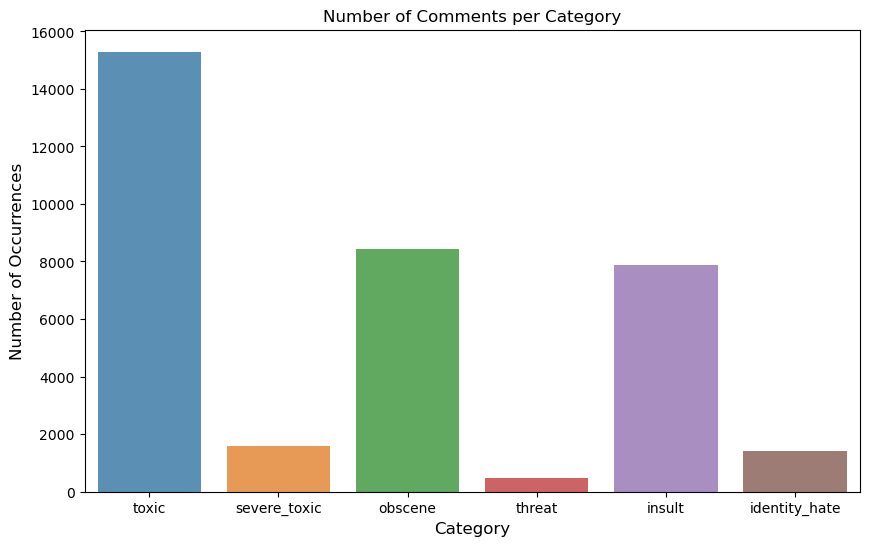

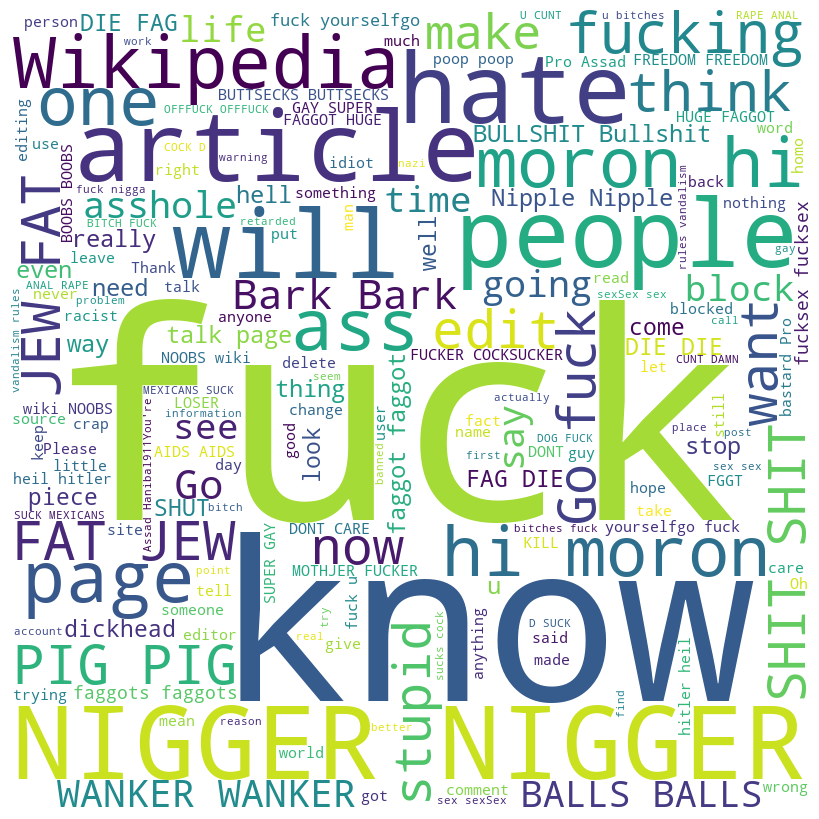

In [11]:
# Step 1: Read the CSV file
data = pd.read_csv('data/train.csv/train.csv')

# Step 2: Bar Chart for Label Distribution
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = data[labels].sum()
print(label_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.title('Number of Comments per Category')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

# Step 3: Word Cloud for Toxic Comments
# same concept as bag of words
toxic_comments = data[data['toxic'] == 1]['comment_text']
toxic_text = " ".join(comment for comment in toxic_comments)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(toxic_text)

# Display the WordCloud                   
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

toxic


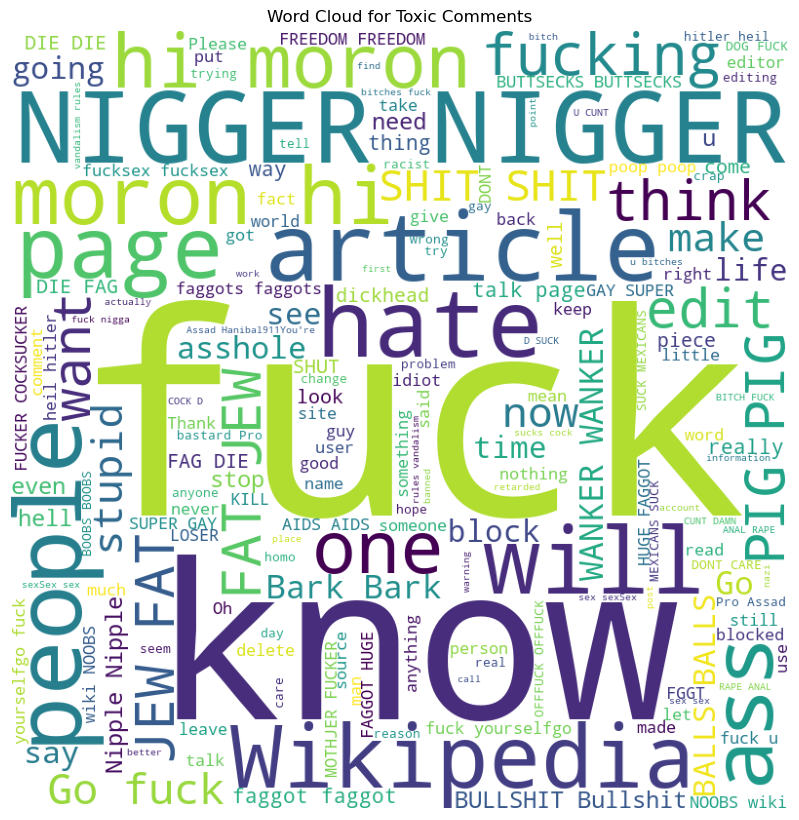

severe_toxic


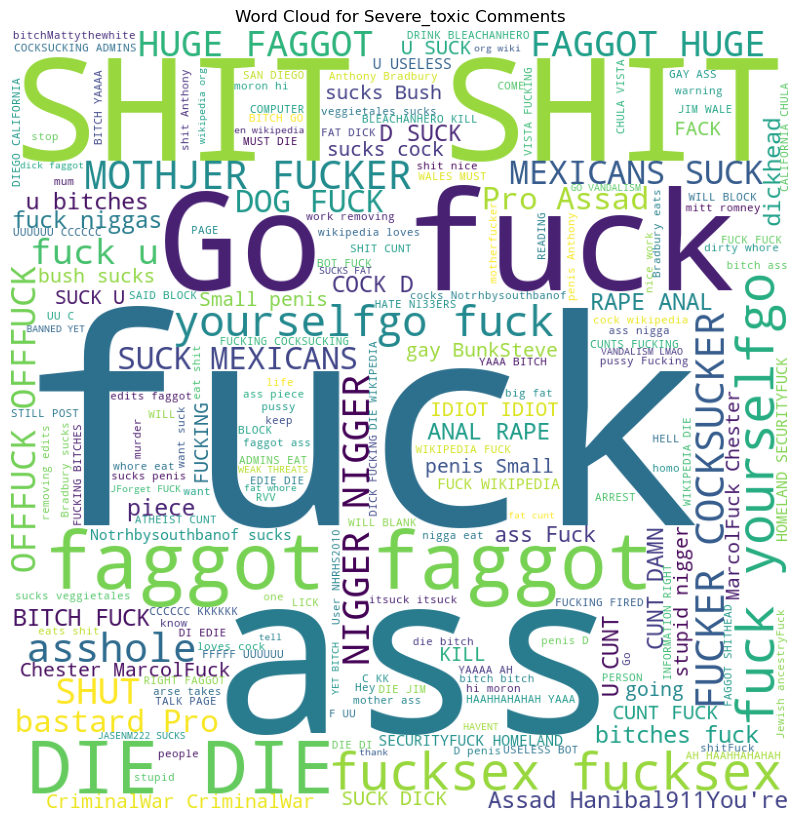

obscene


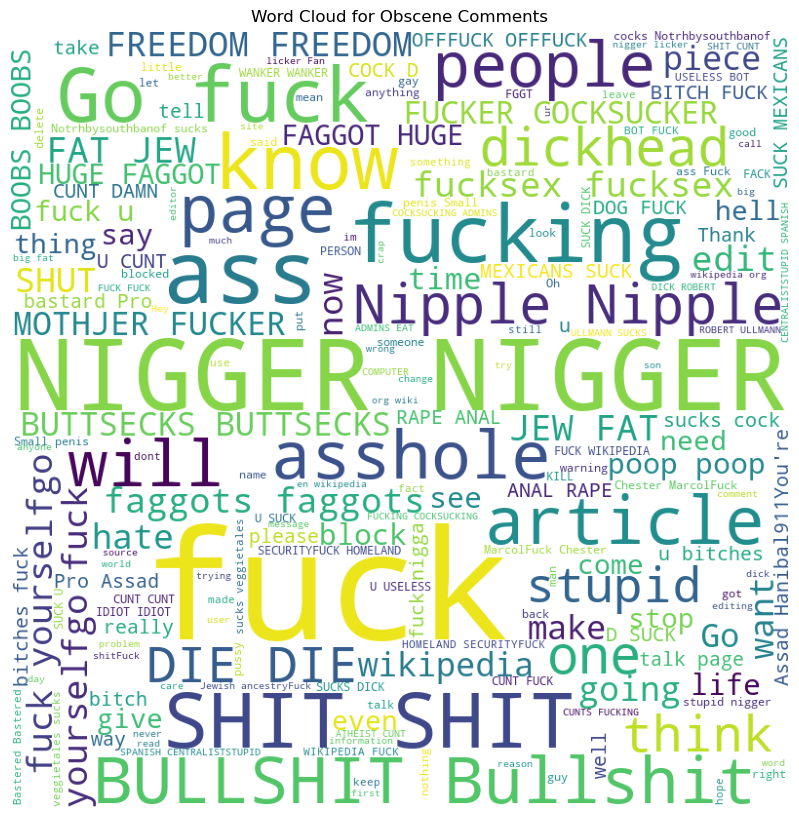

threat


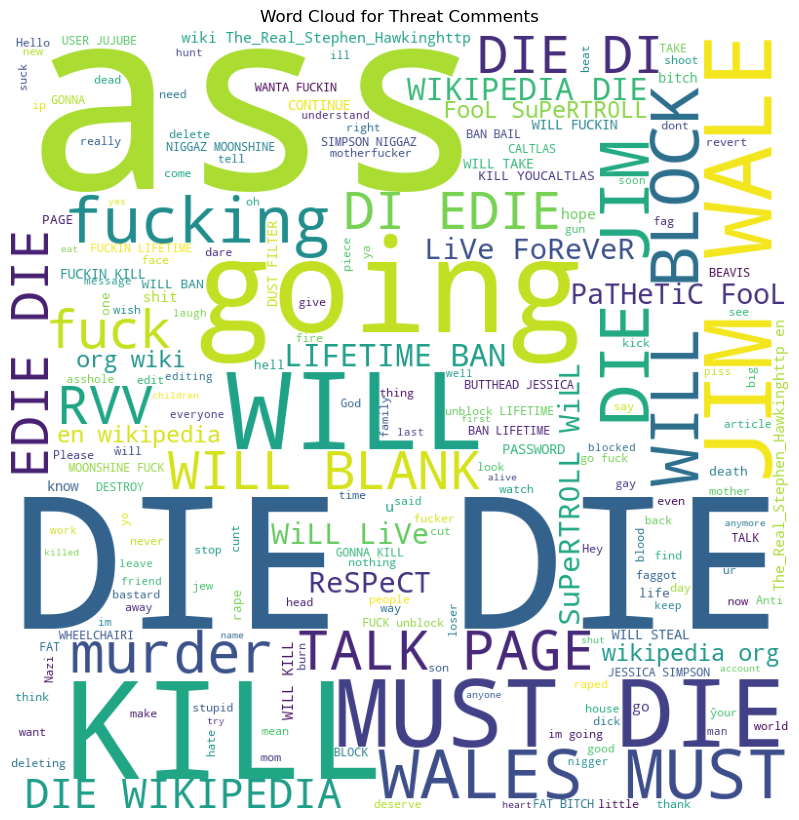

insult


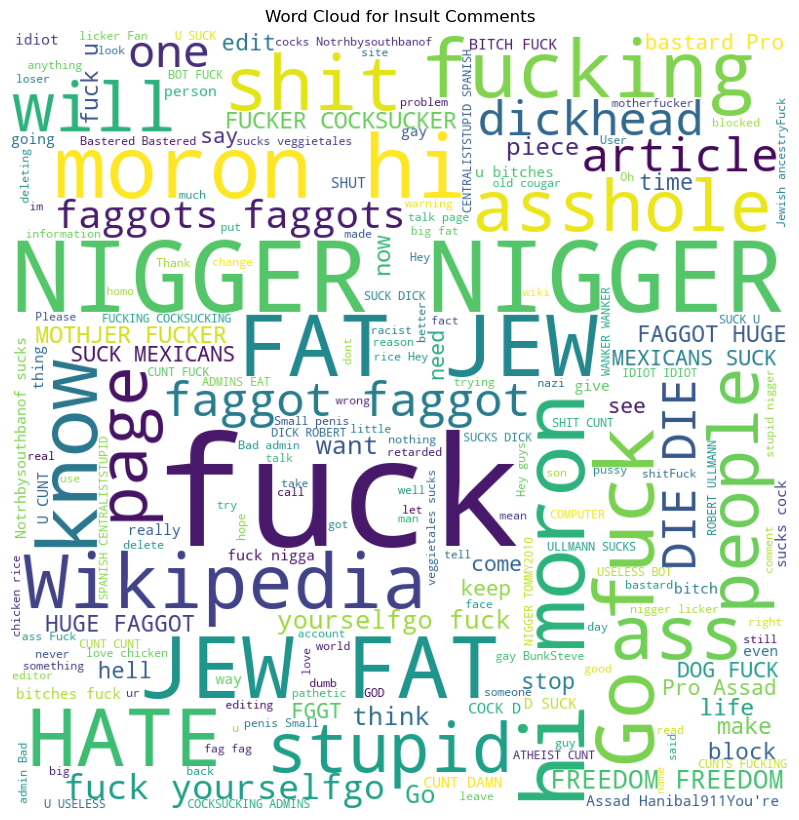

identity_hate


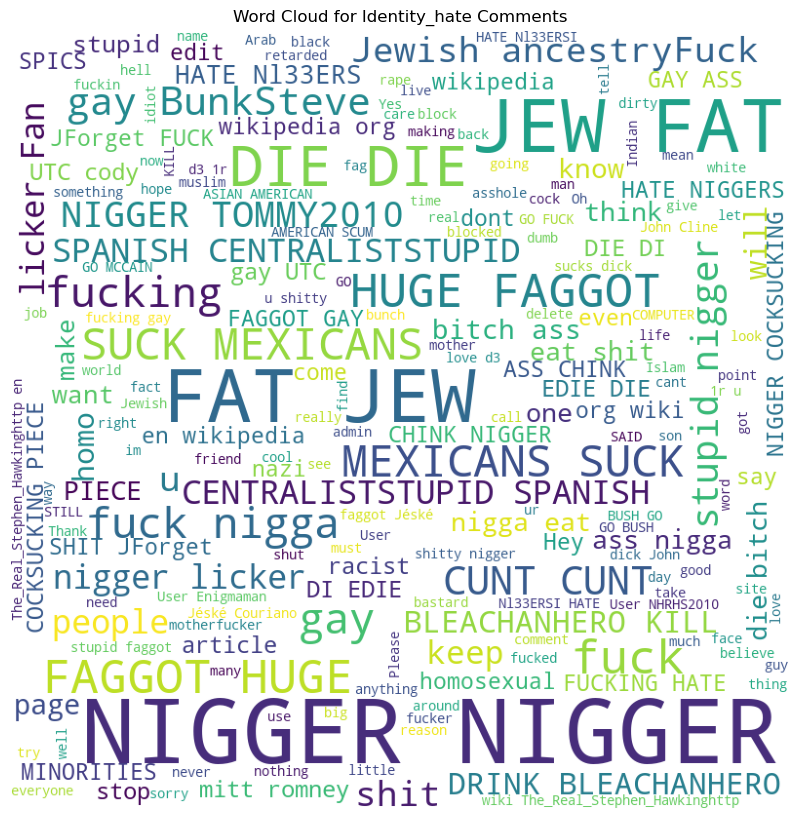

In [12]:
# Loop through each category to create a word cloud
for category in labels:
    # Filter the data for the category
    category_data = data[data[category] == 1]['comment_text']

    # Combine all comments into a single string
    category_text = " ".join(comment for comment in category_data)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=STOPWORDS,
                          min_font_size=10).generate(category_text)

    # Display the WordCloud    
    print(category)               
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(f'Word Cloud for {category.capitalize()} Comments')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [38]:
# Define X and Y
X = data['comment_text']
y = data['identity_hate']  # You can adjust this to target different labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
models = []
for i in range(6):
    m = LogisticRegression()
    # a bunch more stuff with data
    models.append(m)
    
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31625
           1       0.70      0.17      0.27       290

    accuracy                           0.99     31915
   macro avg       0.84      0.58      0.63     31915
weighted avg       0.99      0.99      0.99     31915



In [32]:
import math
x = [0.01*i-5 for i in range(1000)]
testing_y =[1/(1+math.e**(-i)) for i in x]
plt.plot(x, testing_y)
plt.show()


KeyboardInterrupt: 

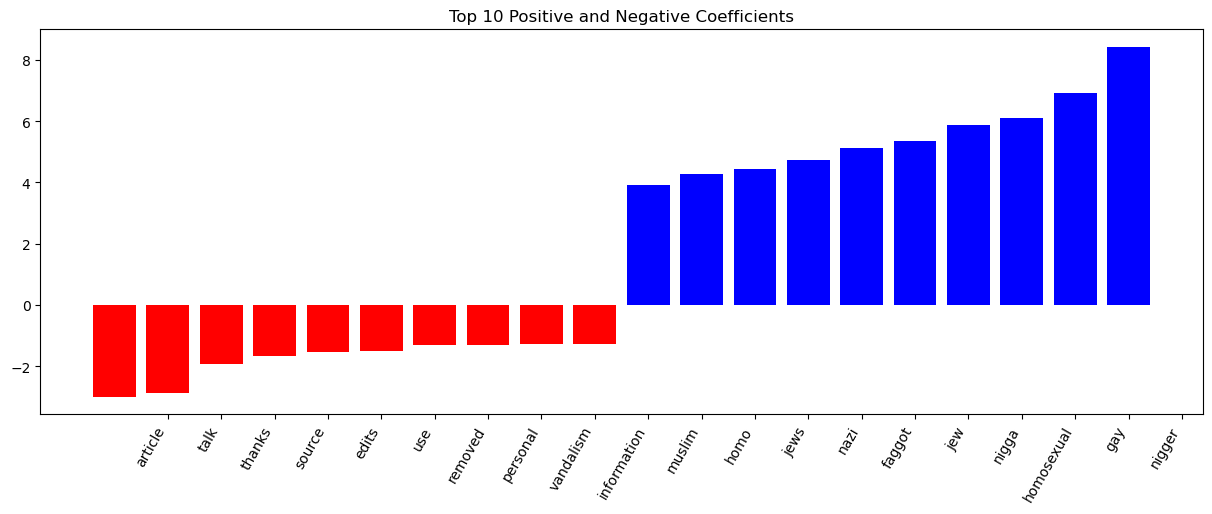

In [39]:
# Get feature names
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Get the coefficients
coefficients = model.coef_.flatten()

# Sort them and get the 10 most influential words for both positive and negative classes
top_positive_coefficients = np.argsort(coefficients)[-10:]
top_negative_coefficients = np.argsort(coefficients)[:10]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

# Create the plot
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coefficients[top_coefficients]]
plt.bar(np.arange(2 * 10), coefficients[top_coefficients], color=colors)
plt.xticks(np.arange(1, 1 + 2 * 10), feature_names[top_coefficients], rotation=60, ha='right')
plt.title('Top 10 Positive and Negative Coefficients')
plt.show()

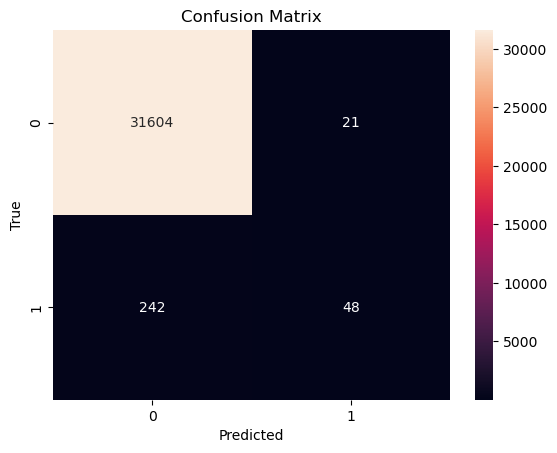

In [40]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

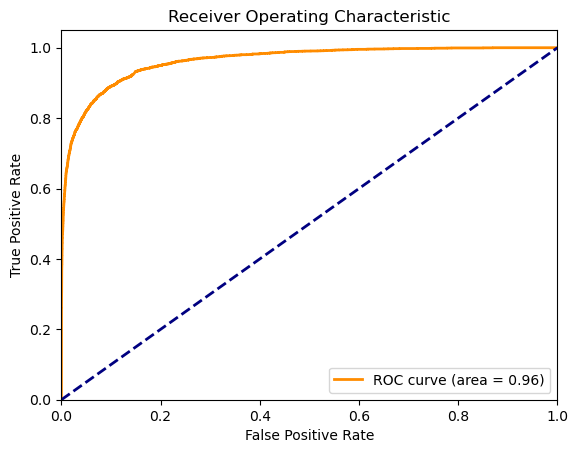

In [16]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
text_bad = "Thank you"
text_bad_vector = tfidf_vectorizer.transform(pd.Series([text_bad]))

y_pred = model.predict(text_bad_vector)
print(y_pred)

[0]
